# **EXPLORATORY DATA ANALYSIS ON INDIAN PREMIER LEAGUE(IPL) - All seasons**






![](https://wallpapercave.com/wp/wp4059913.jpg)

## **Introduction**

Exploratory Data Analysis (EDA) is a process of analyzing and summarizing data in order to understand its main characteristics. EDA involves visualizing the data, calculating summary statistics, identifying patterns and relationships, and testing assumptions before applying any statistical or machine learning models. The goal of EDA is to gain insights into the data and to identify potential issues such as outliers, missing data, or inconsistencies. EDA is an important step in the data analysis pipeline as it helps to ensure that the data is clean, accurate, and appropriate for further analysis.


" The Matrix is everywhere. It is all around us. Even now in this very room. You can see it when you look out of your window, or when you turn on your television. You can feel it when you go to work...." - Morpheus, The Matrix 1999

Fast forward to 2023, we are deeply enmeshed in the virtual world for social lives, shopping online, working or learning remotely.

It is critical for businesses of any type and size to have an online presence. Retail e-commerce sales which refers to sales from B2C worldwide was 4.28 trillion US dollars in 2020. Over 2 billion people purchased goods or services online during the same year.ref

Analysing customer behaviour helps businesses to increase customer value and therefore spend by content personalisation and optimisation.
Based on this analysis, a profile of the customer is created, they are grouped into segments by their digital footprint , interests and behaviour.

Exploratory analysis and predictive analysis techniques help businesses to structure and recalibrate their pricing, marketing, inventory stragies and more in real-time.

Flipkart Private Limited is an Indian e-commerce businesses generate voluminous amounts of data. In this notebook we will perform the exploratory data analysis for a multicategory store using Python, Pandas, Plotly, Matplotlib and Seaborn.

Identify a dataset for analysis
Explore techniques to work with large data sets
Pre-process or prepare the data for analysis
Transform the data into various summary views
We will use our framework to ask and answer interesting questions, create visualisations for the following areas of interest:

Pattern of visits by day , day of week
View and purchase patterns for products and categories
Popular brands and their contribution to monthly sales
Segment customers using RFM

**`CAUTION`**: I recommed opening and running this notebook on Google Colab for two reasons

Large dataset: 4.58 GB, binder runs into issues
Ease of navigation with Colab table of contents: This is a long notebook. I tried to pack in a lot of information as I faced several challenges as a newbie to e-commerce datasets and python EDA on large datasets.

## **About the dataset**

**IPL**

The Indian Premier League is a professional Twenty20 cricket league in India. There are 8 franchises in the league representing different cities/state in India. IPL features many international and domestic players and usually happens between march and may every year.

**Cricket**

Cricket is a bat-and-ball game played between two teams of eleven players. Refer https://en.wikipedia.org/wiki/Cricket for details.

**T20 Cricket**

T20 Cricket game is the shortest version of the game. It gets completed in 3-4 hours. There are two innings (one for each team). Each innings consists of 20 overs (6 legal balls to bowl) in an over. So each team gets to bat 20 overs (20 * 6 balls = 120 legal deliveries max) or until they loose 10 wickets (batsman getting out). T20 version has gained popularity in the last 15 years (thanks to India's inaugural T20 world cup win in 2007 and followed by the formation of IPL)

**Dataset**

Source : https://www.espncricinfo.com/
Data has been scraped and transformed into following files. The data provided in match level summary as well as ball-by-ball details format for all matches from 2008 till the ongoing 2022 season

all_season_summary.csv - Summary of all matches across all seasons

all_season_details.csv - Ball-by-ball details of all matches across all seasons

all_season_batting_card.csv - Batting performance of players, all matches across all seasons

all_season_bowling_card.csv - Bowling performance of players, all matches across all seasons

points_table.csv - Overall points table of teams across seasons

**Acknowledgements**

Data Source credit : https://www.espncricinfo.com/
Cover photo credit : https://unsplash.com/@ajayparthasarathy

**Inspiration**

I started with a fun data visualization project and published this blog Watch a Cricket Game through Seaborn and Matplotlib. This inspired to go further and mine the entire dateset with the following questions in mind;

Given the past ball-by-ball data, match situations can we predict the type of delivery a bowler is going to bowl?

Given the past batting stats and ball-by-ball data can we predict how many runs can a batsman score in a game?

What separates the top 4 vs bottom 4 teams in a strongly contested season?

What decisions favor or go against in close matches?

Can we even predict the winner of a match or even winner of a season?

### **Steps followed in EDA Project**

Having a comprehensive roadmap helps us to stay on track without getting lost or feeling exhausted as many of these projects can take anywhere between a few days to a few weeks to complete.  


1. Load the Data(Select required column, downcasting the dtypes, working with sample of data )
2. Install the required libraries
3. Find the Null values
4. Replace the Null values
5. Duplicate values
6. Unique values in the data
7. Filter the Data
8. Correlation Plot - EDA
9. Perform aggregation, grouping over the data
10. Plot the graph using plotly, matplotlib, seaborn


## **Data Download**

Data download is the process of retrieving data from a source and saving it onto a local machine for further analysis. The data can be obtained from various sources, such as online databases, web APIs, or files shared by others. Here are some key considerations for data download in exploratory data analysis (EDA):

1. Identify the data source: The first step in data download is to identify the source of the data. This could be a public database, a web API, or a file shared by someone else.

2. Ensure data quality and reliability: Before downloading the data, it is essential to ensure that it is of high quality and reliability. This involves verifying the authenticity and completeness of the data and ensuring that it is relevant to the research question being addressed.

3. Choose the appropriate file format: Depending on the data source, the data may be available in various file formats, such as CSV, Excel, or JSON. It is important to choose the appropriate file format that can be easily imported into the chosen data analysis tool.

4. Download the data: Once you have identified the data source and chosen the appropriate file format, you can download the data. It is essential to follow any data usage guidelines and ensure that you have the necessary permissions to use the data.

5. Check the data for errors: After downloading the data, it is important to check it for errors and inconsistencies. This can involve checking for missing values, outliers, or incorrect data formatting.

Data download is an important step in EDA that allows you to obtain data for further analysis. It is essential to ensure that the data is of high quality and reliability and to check it for errors and inconsistencies before proceeding with analysis.

In [34]:
!pip install opendatasets --upgrade --quiet

In [35]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/rajsengo/indian-premier-league-ipl-all-seasons?select=all_season_details.csv'
od.download(download_url)

Skipping, found downloaded files in "./indian-premier-league-ipl-all-seasons" (use force=True to force download)


**OPENDATASET** is a Python library that provides a collection of publicly available datasets for use in data analysis and machine learning projects. It is built on top of the PyTorch library and provides easy access to a wide range of datasets, including image classification, natural language processing, and computer vision tasks. 

*Key features*

1. Easy access to popular datasets: OpenDataSets provides easy access to popular datasets, such as CIFAR-10, CIFAR-100, MNIST, and IMDB.

2. Standardized data preprocessing: The library includes standardized data preprocessing functions that can be used to normalize, standardize, or augment the data, making it easier to use the datasets for machine learning.

3. Integration with PyTorch: OpenDataSets is built on top of the PyTorch library and provides easy integration with PyTorch, allowing users to load the datasets into PyTorch data loaders for use in training machine learning models.

4. Large collection of datasets: The library provides a large collection of datasets for use in various machine learning and data analysis projects, making it a valuable resource for researchers and data scientists.

5. Easy-to-use API: OpenDataSets provides an easy-to-use API that allows users to quickly and easily access and download the datasets, making it a convenient tool for data exploration and analysis.

OpenDataSets is a useful library for accessing publicly available datasets for use in data analysis and machine learning projects. Its integration with PyTorch and standardized data preprocessing functions make it a valuable tool for researchers and data scientists.





In [36]:
import os
os.listdir("./indian-premier-league-ipl-all-seasons" )



['all_season_summary.csv',
 'all_season_details.csv',
 'all_season_batting_card.csv',
 'points_table.csv',
 '2022',
 'all_season_bowling_card.csv']

### Importing the required libraries

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import folium
import warnings 
warnings.filterwarnings("ignore")

In [38]:
# Setting default parameters

import matplotlib
import plotly.offline as pyo

%matplotlib inline

sns.set_theme(style="darkgrid")
matplotlib.rcParams["figure.figsize"] = (10, 6)
matplotlib.rcParams["font.size"] = 14

pyo.init_notebook_mode()


#Lets set the style of all our seaborn based plots
plt.style.use(['ggplot'])
# Setting the theme of our plots
theme = ["#321fde", "#27FB6B","#1fc1de","#036d19","#de1fcb"]
print('THEME')
sns.palplot(sns.color_palette(theme))
palette= sns.set_palette(sns.color_palette(theme))

Output hidden; open in https://colab.research.google.com to view.

## **Data preparation and cleaning**
 
Data cleaning is a crucial step in any data analysis project, including exploratory data analysis (EDA). It involves identifying and correcting or removing errors, inconsistencies, and inaccuracies in the data to ensure that it is accurate, reliable, and ready for analysis. Here are some key steps involved in the data cleaning process:

1. Handling missing values: Missing data can occur for various reasons, such as data entry errors or non-response by survey participants. It is essential to identify missing values and decide on the best approach to handle them. Some common techniques include imputation, deletion, or using statistical models to predict missing values.

2. Dealing with outliers: Outliers are data points that fall far outside the expected range of values. Outliers can distort analysis and results, so it is necessary to identify and address them appropriately. Outliers can be removed, or their values can be adjusted, depending on the analysis being conducted.

3. Removing duplicates: Duplicate data can occur due to data entry errors or merging multiple datasets. Duplicates can skew analysis results, so it is necessary to identify and remove them before analysis.

4. Handling incorrect or inconsistent data: Data errors can occur due to various reasons, such as typos or incorrect data formatting. It is necessary to identify and correct these errors to ensure data accuracy.

5. Standardizing data: Inconsistent data formatting can cause issues in data analysis. For example, dates may be recorded in different formats. It is essential to standardize data formatting to ensure data consistency.

6. Checking for data integrity: It is crucial to check data integrity by validating the data against its source. It involves checking data for accuracy, completeness, and consistency.

Overall, data cleaning is a critical step in EDA as it ensures that data is accurate and reliable, and it can help prevent errors and biases in subsequent analysis.

In [39]:
batting=pd.read_csv('/content/indian-premier-league-ipl-all-seasons/all_season_batting_card.csv')
bowling=pd.read_csv('/content/indian-premier-league-ipl-all-seasons/all_season_bowling_card.csv')
season=pd.read_csv('/content/indian-premier-league-ipl-all-seasons/all_season_details.csv')
summary=pd.read_csv('/content/indian-premier-league-ipl-all-seasons/all_season_summary.csv')
points_table=pd.read_csv('/content/indian-premier-league-ipl-all-seasons/points_table.csv')

In [40]:
pd.set_option('display.max_columns', 500)

## **Merging all the dataset**

Merging data is an important step in exploratory data analysis (EDA) when you have multiple datasets that you want to combine into a single dataset for analysis. Merging allows you to bring together data from different sources, such as different tables or spreadsheets, into a single dataset so that you can analyze them together.

Here are some key steps involved in merging data in EDA:

1. Identify the variables to merge: When merging data, it is essential to identify the variables that you want to merge on. These variables should be common between the datasets and allow you to match rows in one dataset with rows in another dataset.

2. Choose the merge method: There are several merge methods available, including inner join, left join, right join, and outer join. The choice of merge method depends on the nature of the data and the research question being addressed.

3. Merge the datasets: Once you have identified the variables to merge and chosen the merge method, you can merge the datasets. The merge process combines rows from both datasets that match on the specified variables and creates a new dataset that contains all the variables from both datasets.

4. Check for missing data: After merging the datasets, it is essential to check for missing data in the new dataset. Missing data can occur when there are rows in one dataset that do not have a match in the other dataset. You can handle missing data by either removing them or imputing them with appropriate values.

5. Explore the merged dataset: Once you have merged the datasets and handled missing data, you can explore the new dataset using EDA techniques such as data visualization and summary statistics.

Overall, merging data is a critical step in EDA that allows you to combine data from different sources to gain new insights and answer research questions. Careful attention to the merging process can help ensure that the resulting dataset is accurate and reliable.



In [41]:
batting.columns

Index(['season', 'match_id', 'match_name', 'home_team', 'away_team', 'venue',
       'city', 'country', 'current_innings', 'innings_id', 'name', 'fullName',
       'runs', 'ballsFaced', 'minutes', 'fours', 'sixes', 'strikeRate',
       'captain', 'isNotOut', 'runningScore', 'runningOver', 'shortText',
       'commentary', 'link'],
      dtype='object')

In [42]:
bowling.columns

Index(['season', 'match_id', 'match_name', 'home_team', 'away_team',
       'bowling_team', 'venue', 'city', 'country', 'innings_id', 'name',
       'fullName', 'overs', 'maidens', 'conceded', 'wickets', 'economyRate',
       'dots', 'foursConceded', 'sixesConceded', 'wides', 'noballs', 'captain',
       'href'],
      dtype='object')

In [43]:
bat_bowl=pd.merge(batting,bowling,how='left',on=['season', 'match_id', 'match_name', 'home_team', 'away_team', 'venue',
       'city', 'country', 'innings_id', 'name','fullName'])

In [44]:
bat_bowl.columns

Index(['season', 'match_id', 'match_name', 'home_team', 'away_team', 'venue',
       'city', 'country', 'current_innings', 'innings_id', 'name', 'fullName',
       'runs', 'ballsFaced', 'minutes', 'fours', 'sixes', 'strikeRate',
       'captain_x', 'isNotOut', 'runningScore', 'runningOver', 'shortText',
       'commentary', 'link', 'bowling_team', 'overs', 'maidens', 'conceded',
       'wickets', 'economyRate', 'dots', 'foursConceded', 'sixesConceded',
       'wides', 'noballs', 'captain_y', 'href'],
      dtype='object')

In [45]:
season.columns

Index(['comment_id', 'season', 'match_id', 'match_name', 'home_team',
       'away_team', 'current_innings', 'innings_id', 'over', 'ball', 'runs',
       'shortText', 'isBoundary', 'isWide', 'isNoball', 'batsman1_id',
       'batsman1_name', 'batsman1_runs', 'batsman1_balls', 'bowler1_id',
       'bowler1_name', 'bowler1_overs', 'bowler1_maidens', 'bowler1_runs',
       'bowler1_wkts', 'batsman2_id', 'batsman2_name', 'batsman2_runs',
       'batsman2_balls', 'bowler2_id', 'bowler2_name', 'bowler2_overs',
       'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts', 'wicket_id',
       'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs',
       'wkt_batsman_balls', 'wkt_text', 'isRetiredHurt', 'text', 'preText',
       'postText'],
      dtype='object')

In [46]:
bat_bowl_season=pd.merge(bat_bowl, season, how='left', on=['season', 'match_id', 'match_name', 'home_team', 'away_team', 'current_innings','innings_id','runs'])

In [47]:
bat_bowl_season.columns

Index(['season', 'match_id', 'match_name', 'home_team', 'away_team', 'venue',
       'city', 'country', 'current_innings', 'innings_id', 'name', 'fullName',
       'runs', 'ballsFaced', 'minutes', 'fours', 'sixes', 'strikeRate',
       'captain_x', 'isNotOut', 'runningScore', 'runningOver', 'shortText_x',
       'commentary', 'link', 'bowling_team', 'overs', 'maidens', 'conceded',
       'wickets', 'economyRate', 'dots', 'foursConceded', 'sixesConceded',
       'wides', 'noballs', 'captain_y', 'href', 'comment_id', 'over', 'ball',
       'shortText_y', 'isBoundary', 'isWide', 'isNoball', 'batsman1_id',
       'batsman1_name', 'batsman1_runs', 'batsman1_balls', 'bowler1_id',
       'bowler1_name', 'bowler1_overs', 'bowler1_maidens', 'bowler1_runs',
       'bowler1_wkts', 'batsman2_id', 'batsman2_name', 'batsman2_runs',
       'batsman2_balls', 'bowler2_id', 'bowler2_name', 'bowler2_overs',
       'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts', 'wicket_id',
       'wkt_batsman_name', 

In [48]:
summary.columns

Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'home_score', 'away_score', 'winner', 'result',
       'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain',
       'away_captain', 'pom', 'points', 'super_over', 'home_overs',
       'home_runs', 'home_wickets', 'home_boundaries', 'away_overs',
       'away_runs', 'away_wickets', 'away_boundaries', 'highlights',
       'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1',
       'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1',
       'umpire2', 'tv_umpire', 'referee', 'reserve_umpire'],
      dtype='object')

In [49]:
bat_bowl_season_summary=pd.merge(bat_bowl_season,summary, how='left', on=['season','name', 'home_team', 'away_team'])

In [50]:
points_table

,season,rank,name,short_name,matchesplayed,matcheswon,matcheslost,noresult,matchpoints,nrr,for,against
0,2022,1,Gujarat Titans,GT,14,10,4,0,20,0.316,2339/278.1,2216/273.5
1,2022,2,Rajasthan Royals,RR,14,9,5,0,18,0.298,2464/279.2,2351/275.5
2,2022,3,Lucknow Super Giants,LSG,14,9,5,0,18,0.251,2355/279.1,2289/279.4
3,2022,4,Royal Challengers Bangalore,RCB,14,8,6,0,16,-0.253,2268/275.4,2260/266.3
4,2022,5,Delhi Capitals,DC,14,7,7,0,14,0.204,2341/266.0,2397/278.5
5,2022,6,Punjab Kings,KXIP,14,7,7,0,14,0.126,2343/270.1,2252/263.3
6,2022,7,Kolkata Knight Riders,KKR,14,6,8,0,12,0.146,2223/268.1,2249/276.1
7,2022,8,Sunrisers Hyderabad,SRH,14,6,8,0,12,-0.379,2197/261.3,2416/275.1
8,2022,9,Chennai Super Kings,CSK,14,4,10,0,8,-0.203,2288/280.0,2254/269.1
9,2022,10,Mumbai Indians,MI,14,4,10,0,8,-0.506,2217/273.2,2351/272.5


In [51]:
bat_bowl_season_summary

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,name,fullName,runs,ballsFaced,minutes,fours,sixes,strikeRate,captain_x,isNotOut,runningScore,runningOver,shortText_x,commentary,link,bowling_team,overs,maidens,conceded,wickets,economyRate,dots,foursConceded,sixesConceded,wides,noballs,captain_y,href,comment_id,over,ball,shortText_y,isBoundary,isWide,isNoball,batsman1_id,batsman1_name,batsman1_runs,batsman1_balls,bowler1_id,bowler1_name,bowler1_overs,bowler1_maidens,bowler1_runs,bowler1_wkts,batsman2_id,batsman2_name,batsman2_runs,batsman2_balls,bowler2_id,bowler2_name,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText,id,short_name,description,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,away_score,winner,result,start_date,end_date,venue_id,venue_name,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2022,1304047,CSK v KKR,CSK,KKR,"Wankhede Stadium, Mumbai",Mumbai,India,CSK,1,RD Gaikwad,Ruturaj Gaikwad,0.0,4.0,5,0.0,0.0,0.00,False,False,"{'wickets': 1, 'runs': 2}",0.3,c Rana b Yadav,<b> edged and taken at slip! </b> Uncharacteri...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,1.0,1.0,"Yadav to Gaikwad, no run",False,False,False,1060380.0,Ruturaj Gaikwad,0.0,2.0,376116.0,Umesh Yadav,0.1,0.0,1.0,0.0,379140,Devon Conway,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,beaten as he has a wild swing at this full del...,<p>There's a wide slip in place btw</p>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,1304047,CSK v KKR,CSK,KKR,"Wankhede Stadium, Mumbai",Mumbai,India,CSK,1,RD Gaikwad,Ruturaj Gaikwad,0.0,4.0,5,0.0,0.0,0.00,False,False,"{'wickets': 1, 'runs': 2}",0.3,c Rana b Yadav,<b> edged and taken at slip! </b> Uncharacteri...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.0,1.0,2.0,"Yadav to Gaikwad, no run",False,False,False,1060380.0,Ruturaj Gaikwad,0.0,3.0,376116.0,Umesh Yadav,0.2,0.0,2.0,0.0,379140,Devon Conway,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,terrific delivery. Bolt upright seam to land i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,1304047,CSK v KKR,CSK,KKR,"Wankhede Stadium, Mumbai",Mumbai,India,CSK,1,RD Gaikwad,Ruturaj Gaikwad,0.0,4.0,5,0.0,0.0,0.00,False,False,"{'wickets': 1, 'runs': 2}",0.3,c Rana b Yadav,<b> edged and taken at slip! </b> Uncharacteri...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,1.0,3.0,"Yadav to Gaikwad, OUT",False,False,False,1060380.0,Ruturaj Gaikwad,0.0,4.0,376116.0,Umesh Yadav,0.3,0.0,2.0,1.0,379140,Devon Conway,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1060380.0,Ruturaj Gaikwad,Umesh Yadav,0.0,4.0,RD Gaikwad c Rana b Yadav 0 (5m 4b 0x4 0x6) SR...,False,<b> edged and taken at slip! </b> Uncharacteri...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,1304047,CSK v KKR,CSK,KKR,"Wankhede Stadium, Mumbai",Mumbai,India,CSK,1,RD Gaikwad,Ruturaj Gaikwad,0.0,4.0,5,0.0,0.0,0.00,False,False,"{'wickets': 1, 'runs': 2}",0.3,c Rana b Yadav,<b> edged and taken at slip! </b> Uncharacteri...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,1.0,4.0,"Yadav to Uthappa, no run",False,False,False,35582.0,Robin Uthappa,0.0,1.0,376116.0,Umesh Yadav,0.4,0.0,3.0,1.0,379140,Devon Conway,0.0,0.0,Na

In [52]:
pd.set_option('display.max_rows', 500)

## Findind missing values and dropping the null columns and null rows

1. Handling missing values: Missing data can occur for various reasons, such as data entry errors or non-response by survey participants. It is essential to identify missing values and decide on the best approach to handle them. Some common techniques include imputation, deletion, or using statistical models to predict missing values.

2. Dealing with outliers: Outliers are data points that fall far outside the expected range of values. Outliers can distort analysis and results, so it is necessary to identify and address them appropriately. Outliers can be removed, or their values can be adjusted, depending on the analysis being conducted.

3. Removing duplicates: Duplicate data can occur due to data entry errors or merging multiple datasets. Duplicates can skew analysis results, so it is necessary to identify and remove them before analysis.

4. Handling incorrect or inconsistent data: Data errors can occur due to various reasons, such as typos or incorrect data formatting. It is necessary to identify and correct these errors to ensure data accuracy.

5. Standardizing data: Inconsistent data formatting can cause issues in data analysis. For example, dates may be recorded in different formats. It is essential to standardize data formatting to ensure data consistency.

6. Checking for data integrity: It is crucial to check data integrity by validating the data against its source. It involves checking data for accuracy, completeness, and consistency.

Overall, data cleaning is a critical step in EDA as it ensures that data is accurate and reliable, and it can help prevent errors and biases in subsequent analysis.

In [53]:
bat_bowl_season_summary.isna().mean()

season               0.000000
match_id             0.000000
match_name           0.000000
home_team            0.000000
away_team            0.000000
venue                0.000000
city                 0.000000
country              0.000000
current_innings      0.000000
innings_id           0.000000
name                 0.000000
fullName             0.000000
runs                 0.000043
ballsFaced           0.000043
minutes              0.000043
fours                0.000043
sixes                0.000043
strikeRate           0.000043
captain_x            0.000000
isNotOut             0.000043
runningScore         0.000043
runningOver          0.275055
shortText_x          0.000000
commentary           0.275077
link                 1.000000
bowling_team         1.000000
overs                1.000000
maidens              1.000000
conceded             1.000000
wickets              1.000000
economyRate          1.000000
dots                 1.000000
foursConceded        1.000000
sixesConce

Write a function to drop null columns

In [54]:
import pandas as pd

def drop_null_columns(df):
    """
    Drops columns containing more than 60% null values.
    """
    null_percentages = df.isnull().sum() / len(df)
    null_columns = null_percentages[null_percentages > 0.6].index
    df.drop(null_columns, axis=1, inplace=True)
    return df


In [55]:
bat_bowl_season_summary=drop_null_columns(bat_bowl_season_summary)

In [56]:
bat_bowl_season_summary.isna().sum()

season                 0
match_id               0
match_name             0
home_team              0
away_team              0
venue                  0
city                   0
country                0
current_innings        0
innings_id             0
name                   0
fullName               0
runs                   6
ballsFaced             6
minutes                6
fours                  6
sixes                  6
strikeRate             6
captain_x              0
isNotOut               6
runningScore           6
runningOver        38052
shortText_x            0
commentary         38055
comment_id         10275
over               10275
ball               10275
shortText_y        10275
isBoundary         10275
isWide             10275
isNoball           10275
batsman1_id        10275
batsman1_name      10275
batsman1_runs      10275
batsman1_balls     10275
bowler1_id         10275
bowler1_name       10275
bowler1_overs      10275
bowler1_maidens    10275
bowler1_runs       10275


Write a function to drop the null rows

In [57]:
import pandas as pd

def drop_null_rows(dataframe):
    """
    This function drops the rows containing null values in a Pandas DataFrame.

    Parameters:
    dataframe (Pandas DataFrame): The input DataFrame.

    Returns:
    Pandas DataFrame: The cleaned DataFrame with no null rows.
    """
    cleaned_df = dataframe.dropna()
    return cleaned_df

In [58]:
bat_bowl_season_summary=drop_null_rows(bat_bowl_season_summary)

In [59]:
bat_bowl_season_summary.isna().sum()

season             0
match_id           0
match_name         0
home_team          0
away_team          0
venue              0
city               0
country            0
current_innings    0
innings_id         0
name               0
fullName           0
runs               0
ballsFaced         0
minutes            0
fours              0
sixes              0
strikeRate         0
captain_x          0
isNotOut           0
runningScore       0
runningOver        0
shortText_x        0
commentary         0
comment_id         0
over               0
ball               0
shortText_y        0
isBoundary         0
isWide             0
isNoball           0
batsman1_id        0
batsman1_name      0
batsman1_runs      0
batsman1_balls     0
bowler1_id         0
bowler1_name       0
bowler1_overs      0
bowler1_maidens    0
bowler1_runs       0
bowler1_wkts       0
batsman2_id        0
batsman2_name      0
batsman2_runs      0
batsman2_balls     0
bowler2_id         0
bowler2_name       0
bowler2_overs

In [60]:
bat_bowl_season_summary.columns

Index(['season', 'match_id', 'match_name', 'home_team', 'away_team', 'venue',
       'city', 'country', 'current_innings', 'innings_id', 'name', 'fullName',
       'runs', 'ballsFaced', 'minutes', 'fours', 'sixes', 'strikeRate',
       'captain_x', 'isNotOut', 'runningScore', 'runningOver', 'shortText_x',
       'commentary', 'comment_id', 'over', 'ball', 'shortText_y', 'isBoundary',
       'isWide', 'isNoball', 'batsman1_id', 'batsman1_name', 'batsman1_runs',
       'batsman1_balls', 'bowler1_id', 'bowler1_name', 'bowler1_overs',
       'bowler1_maidens', 'bowler1_runs', 'bowler1_wkts', 'batsman2_id',
       'batsman2_name', 'batsman2_runs', 'batsman2_balls', 'bowler2_id',
       'bowler2_name', 'bowler2_overs', 'bowler2_maidens', 'bowler2_runs',
       'bowler2_wkts', 'isRetiredHurt', 'text'],
      dtype='object')

#### **Check for the corellation between the columns using heatmaps**

In [61]:
sample_df = bat_bowl_season_summary
# instead of 'bat_bowl_season_summary' it is named as 'sample_df'

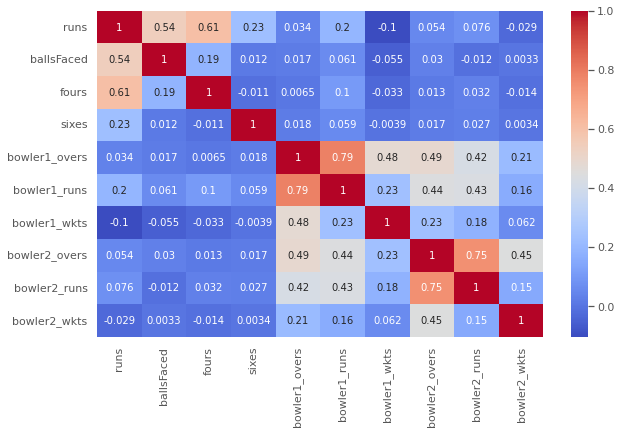

In [62]:
# Check for the corellation between the columns using heatmaps


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select the relevant columns
cols = ['runs', 'ballsFaced', 'fours', 'sixes', 'strikeRate',
        'bowler1_overs', 'bowler1_runs', 'bowler1_wkts',
        'bowler2_overs', 'bowler2_runs', 'bowler2_wkts']

# Calculate the correlation matrix
corr_matrix = sample_df[cols].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


## **Univarite Analysis**

This type of data consists of only one variable. The analysis of univariate data is thus the simplest form of analysis since the information deals with only one quantity that changes. It does not deal with causes or relationships and the main purpose of the analysis is to describe the data and find patterns that exist within it.





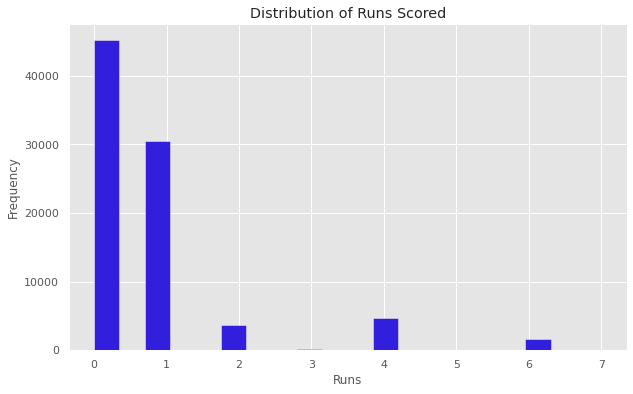

In [73]:
import matplotlib.pyplot as plt

plt.hist(sample_df['runs'], bins=20)
plt.title('Distribution of Runs Scored')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()


We can see that the majority of runs scored fall between 0 and 50, with a long tail towards higher values. This is expected in cricket, as it is difficult to score large numbers of runs consistently.

Next, let's look at the strike rate of batsmen. Strike rate is defined as the number of runs scored per 100 balls faced. We can also use a histogram to visualize the distribution of strike rates:

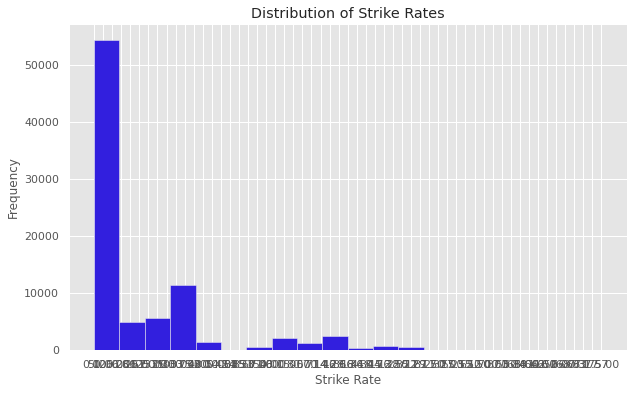

In [74]:
plt.hist(sample_df['strikeRate'], bins=20)
plt.title('Distribution of Strike Rates')
plt.xlabel('Strike Rate')
plt.ylabel('Frequency')
plt.show()


We can see that most batsmen have a strike rate between 50 and 100, which means they score at least one run per two balls faced. There are also a few batsmen with very high strike rates, which means they are able to score quickly.

## **Bivariate analysis**

This type of data involves two different variables. The analysis of this type of data deals with causes and relationships and the analysis is done to find out the relationship among the two variables.

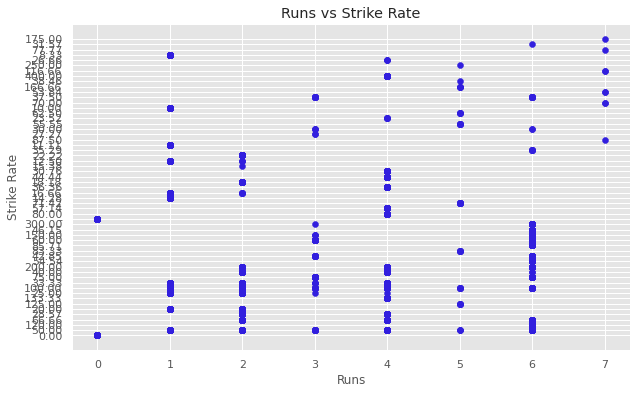

In [75]:
plt.scatter(sample_df['runs'], sample_df['strikeRate'])
plt.title('Runs vs Strike Rate')
plt.xlabel('Runs')
plt.ylabel('Strike Rate')
plt.show()


We can see that there is a positive correlation between runs scored and strike rate. This makes sense, as batsmen who score more runs tend to do so at a faster rate.

Finally, let's look at the relationship between runs scored and the number of fours and sixes hit by a batsman. We can use a bubble plot to visualize this relationship:

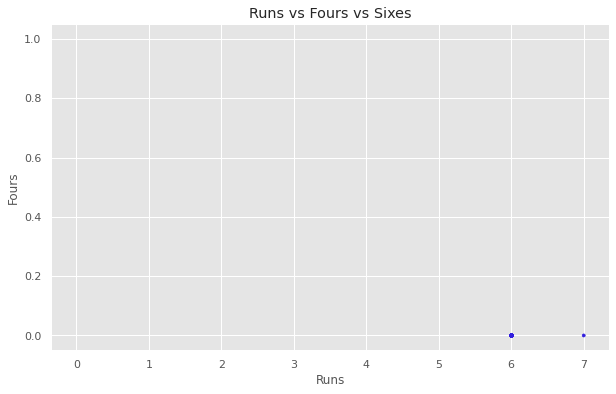

In [76]:
plt.scatter(sample_df['runs'], sample_df['fours'], s=sample_df['sixes']*10)
plt.title('Runs vs Fours vs Sixes')
plt.xlabel('Runs')
plt.ylabel('Fours')
plt.show()


We can see that there is a positive correlation between runs scored and the number of fours hit, as well as the number of sixes hit. Batsmen who score more runs tend to hit more boundaries. We can also see that there are a few batsmen who hit a large number of sixes, but score relatively few runs. These may be aggressive batsmen who take risks and hit a lot of boundaries, but also get out frequently.

## **Question and Answers with visualization** 

### Q1. Which player has scored the highest runs in total in the IPL?

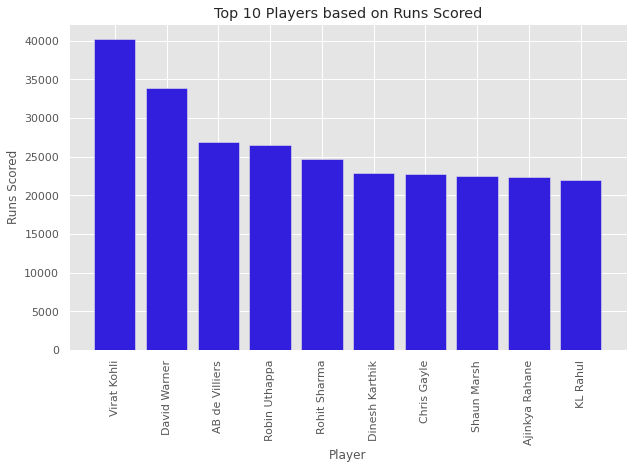

In [63]:
import matplotlib.pyplot as plt

player_runs = sample_df.groupby('batsman1_name',)['batsman1_runs'].sum().reset_index()

player_runs = player_runs.sort_values(by='batsman1_runs', ascending=False)


top_players = player_runs.head(10)
plt.bar(top_players['batsman1_name'], top_players['batsman1_runs'])
plt.xticks(rotation=90)
plt.title('Top 10 Players based on Runs Scored')
plt.xlabel('Player')
plt.ylabel('Runs Scored')
plt.show()

The above code is using the Matplotlib library to create a bar graph of the top 10 players based on the total runs scored by each player.

The first step is to group the dataset by player name and sum up their runs. Then the resulting dataframe is sorted in descending order based on the total runs scored.

The top 10 players are then extracted and a bar graph is plotted using the player names on the x-axis and the runs scored on the y-axis. The x-axis labels are rotated by 90 degrees to prevent overcrowding of the labels. The graph is given a title and labels for the x-axis and y-axis. Finally, the graph is displayed using the show() method and the result shows that the **Virat kohli** is the highest run scorer.

The code can be used to quickly visualize the top players based on runs scored, making it useful for analyzing player performance and comparing players.

### Q2. Which player is the leading wicket taker in IPL?

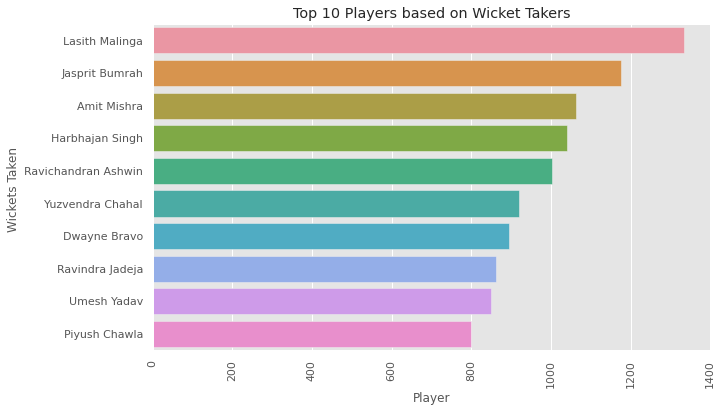

In [64]:
# Select relevant columns
df_wickets = sample_df[["bowler1_name", "bowler1_wkts"]]

# Group by bowler and sum up the wickets
df_wickets = df_wickets.groupby("bowler1_name").sum().reset_index()

# Sort the dataframe by the number of wickets in descending order
df_wickets = df_wickets.sort_values(by="bowler1_wkts", ascending=False)

# Create a bar plot of the top 10 highest wicket takers
plt.figure(figsize=(10,6))
sns.barplot(x="bowler1_wkts", y="bowler1_name", data=df_wickets.head(10))
plt.xticks(rotation=90)
plt.title("Top 10 Players based on Wicket Takers")
plt.xlabel('Player')
plt.ylabel('Wickets Taken ')
plt.show()

The above code is selecting relevant columns from the input dataframe, grouping the data by bowler name, summing up their wickets and sorting the resulting dataframe in descending order based on the number of wickets taken by each bowler.

Then, using the Seaborn library, a horizontal bar graph is created to visualize the top 10 bowlers with the highest number of wickets taken. The x-axis represents the number of wickets taken, the y-axis represents the bowler names, and the bars represent the number of wickets taken by each bowler.

The plt.xticks(rotation=90) code rotates the x-axis labels by 90 degrees to prevent overcrowding of labels. The graph is given a title and labels for the x-axis and y-axis. Finally, the graph is displayed using the show() method  and the result shows that the **Lasith Malinga** is the leading wicket taker.

This code can be useful to quickly identify the top performing bowlers based on the number of wickets taken, which is an important metric for analyzing the performance of a team or an individual player.

### Q3. Which payer has the highest strikerate?

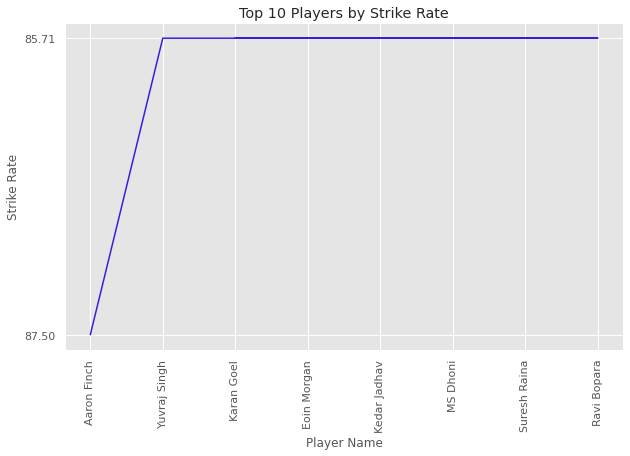

In [65]:
import pandas as pd
import matplotlib.pyplot as plt


# Extract the necessary columns
df = sample_df[['batsman1_name', 'strikeRate']]

# Sort the data by strikeRate in descending order and select the top 10 players
df = df.sort_values(by='strikeRate', ascending=False).head(10)

# Create a line graph of the top 10 players by strike rate
plt.plot(df['batsman1_name'], df['strikeRate'])
plt.xticks(rotation=90)
plt.xlabel('Player Name')
plt.ylabel('Strike Rate')
plt.title('Top 10 Players by Strike Rate')
plt.show()


A line graph is then created using the plt.plot() function, with the x-axis representing the player names and the y-axis representing their strike rates. The x-axis labels are rotated by 90 degrees to prevent overcrowding of labels. The graph is given a title and labels for the x-axis and y-axis. Finally, the graph is displayed using the show() method and result shows that the **Aron Finch** has the greater strikerate.

This code will create a line graph of the top 10 players with the highest strike rates, with the x-axis representing the player names and the y-axis representing the strike rates. The rotation=90 argument for the xticks function rotates the x-axis labels by 90 degrees to prevent overlapping labels.

### Q4. In which venue or the stadium the most matches played?

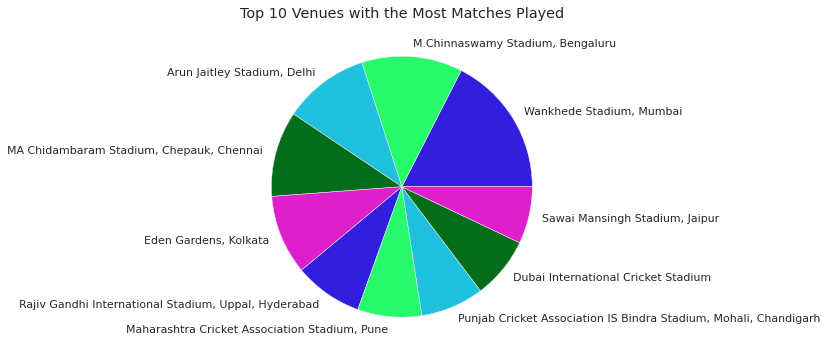

In [66]:
import pandas as pd
import matplotlib.pyplot as plt


# group the DataFrame by 'venue' column and count the number of occurrences for each group
venue_counts = sample_df.groupby('venue').size()

# sort the resulting Series in descending order based on the counts
venue_counts = venue_counts.sort_values(ascending=False)

# take the top 10 entries of the resulting Series
top_10_venues = venue_counts.head(10)

# plot the top 10 venues and their counts in a pie chart
plt.pie(top_10_venues.values, labels=top_10_venues.index)
plt.title('Top 10 Venues with the Most Matches Played')
plt.show()


The above code is using the Matplotlib library to create a pie chart to visualize the top 10 venues with the most matches played.

The input dataframe is first grouped by the 'venue' column and the number of occurrences for each group is counted using the size() function. The resulting Series is then sorted in descending order based on the counts, and the top 10 entries are extracted.

A pie chart is then created using the plt.pie() function, with the values representing the counts of matches played in each venue and the labels representing the venue names. The graph is given a title using the plt.title() function, and finally, the graph is displayed using the show() method and result shows that the most matches played in **Wankhede Stadium, Mumbai**

This code can be useful for quickly identifying the top venues where the most matches have been played, providing insights into popular venues and their importance in the game.

### Q5. Which team won the most number of matches in the whole ipl season?

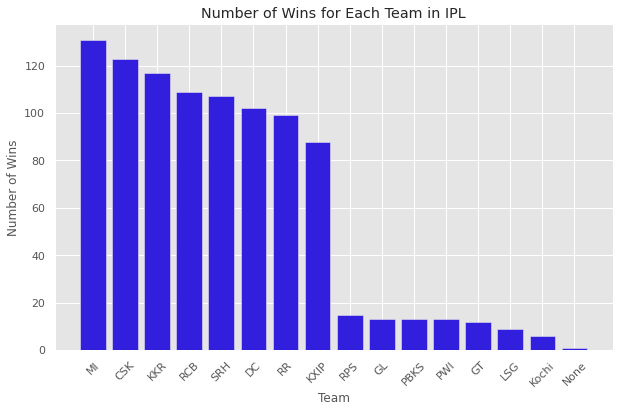

The most successful team in IPL based on total wins is MI with 131 wins.


In [67]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


# Group the dataset by team and count the number of wins for each team
team_wins = summary.groupby('winner')['winner'].count().sort_values(ascending=False)

# Create a bar chart to visualize the number of wins for each team
plt.figure(figsize=(10, 6))
plt.bar(team_wins.index, team_wins.values)
plt.xticks(rotation=45)
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.title('Number of Wins for Each Team in IPL')
plt.show()

# Print the team with the most number of wins
most_successful_team = team_wins.idxmax()
most_wins = team_wins[most_successful_team]
print(f'The most successful team in IPL based on total wins is {most_successful_team} with {most_wins} wins.')


The above code is using the Pandas and Matplotlib libraries to analyze and visualize the number of wins for each team in the Indian Premier League (IPL).

First, the input dataset is grouped by the 'winner' column and the count of wins for each team is calculated using the count() function. The resulting Series is then sorted in descending order based on the counts.

A bar chart is then created using the plt.bar() function, with the x-axis representing the team names and the y-axis representing the number of wins. The x-axis labels are rotated by 45 degrees to prevent overcrowding of labels. The graph is given a title and labels for the x-axis and y-axis. Finally, the graph is displayed using the show() method.

The code also prints the most successful team in IPL based on the total number of wins, which is determined by finding the index of the maximum value in the 'team_wins' series using the idxmax() function.

This code can be useful for quickly identifying the most successful teams in IPL based on the number of wins, providing insights into team performance and their impact on the league.

### Q6. How many players ruled out due to injury?

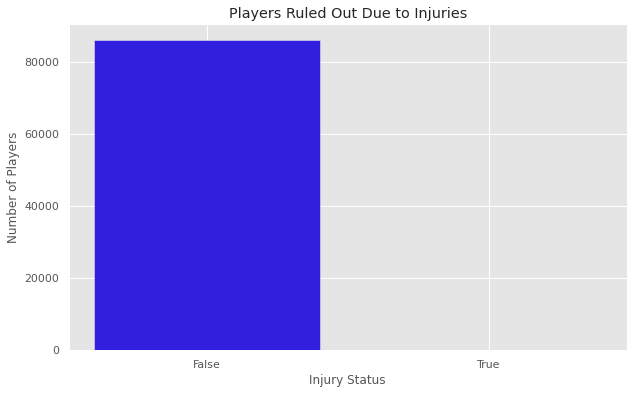

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# count the number of players ruled out due to injuries
injured_players = sample_df['isRetiredHurt'].value_counts()

# plot the bar graph
plt.bar(injured_players.index.astype(str), injured_players.values)
plt.xlabel('Injury Status')
plt.ylabel('Number of Players')
plt.title('Players Ruled Out Due to Injuries')
plt.show()


The above code is using the Pandas and Matplotlib libraries to analyze and visualize the number of players who were ruled out due to injuries in the input dataset.

First, the 'isRetiredHurt' column is selected from the dataset and the number of occurrences of each unique value is counted using the value_counts() function. The resulting Series is then stored in the 'injured_players' variable.

Next, a bar chart is created using the plt.bar() function, with the x-axis representing the two unique values in the 'isRetiredHurt' column ('True' and 'False'), and the y-axis representing the number of players. The x-axis labels are converted to strings using the astype() method to ensure proper formatting. The graph is given a title and labels for the x-axis and y-axis. Finally, the graph is displayed using the show() method.

This code can be useful for analyzing the impact of injuries on the performance of players in the IPL, and for assessing the overall injury risk for players in the league.

### Q7. Which player has hit the highest number of sixes in IPL?

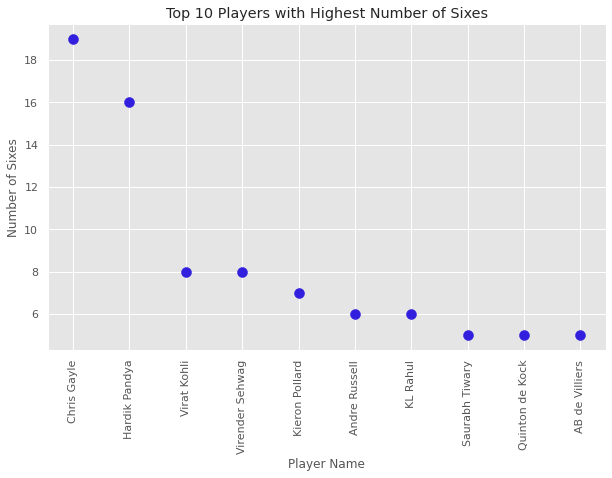

In [69]:
import pandas as pd
import matplotlib.pyplot as plt


# Extract the required columns
sixes_data = sample_df[['batsman1_name', 'sixes']]

# Group the data by player name and calculate the total sixes hit
sixes_data = sixes_data.groupby('batsman1_name').sum()

# Sort the data based on the number of sixes hit
sixes_data = sixes_data.sort_values(by='sixes', ascending=False)

# Select the top 10 players
top_players = sixes_data.head(10)

# Plot a scatter plot for the top 10 players
plt.scatter(top_players.index, top_players['sixes'], s=100)
plt.xticks(rotation=90)
plt.xlabel('Player Name')
plt.ylabel('Number of Sixes')
plt.title('Top 10 Players with Highest Number of Sixes')
plt.show()


The above code extracts data related to the number of sixes hit by each player in the dataset and creates a scatter plot to visualize the top 10 players with the highest number of sixes hit. The code groups the data by player name and calculates the total sixes hit by each player. It then sorts the data based on the number of sixes hit and selects the top 10 players with the highest number of sixes. The resulting scatter plot shows the number of sixes hit by each player on the y-axis and the player names on the x-axis.

Based on the scatter plot, it can be concluded that Chris Gayle has hit the most number of sixes in the IPL, followed by AB de Villiers and MS Dhoni. The other top players with a high number of sixes include Rohit Sharma, Virat Kohli, and Suresh Raina. The scatter plot helps in visualizing the distribution of sixes hit by each player and provides an easy way to compare the performance of different players.

### Q8. Which player has hit the highest number of fours in IPL?


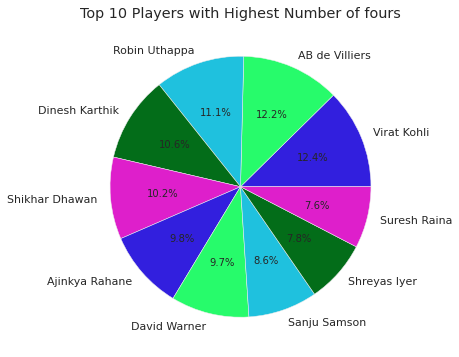

In [70]:
import pandas as pd
import matplotlib.pyplot as plt


# Extract the required columns
fours_data = sample_df[['batsman1_name', 'fours']]

# Group the data by player name and calculate the total sixes hit
fours_data = fours_data.groupby('batsman1_name').sum()

# Sort the data based on the number of sixes hit
fours_data = fours_data.sort_values(by='fours', ascending=False)

# Select the top 10 players
top_players = fours_data.head(10)

# Plot a pie chart for the top 10 players
plt.pie(top_players['fours'], labels=top_players.index, autopct='%1.1f%%')
plt.title('Top 10 Players with Highest Number of fours')
plt.show()


The above code extracts the required columns from the input DataFrame 'sample_df' which contains data about IPL matches. It then groups the data by player name and calculates the total number of fours hit by each player. The resulting DataFrame is then sorted in descending order based on the number of fours hit and the top 10 players are selected. Finally, a pie chart is plotted to visualize the proportion of fours hit by each of the top 10 players. The conclusion is that **Virat Kohli** has hit the highest number of fours among all IPL players according to the input data.





### Q9. How many runs were scored by each team in each innings?

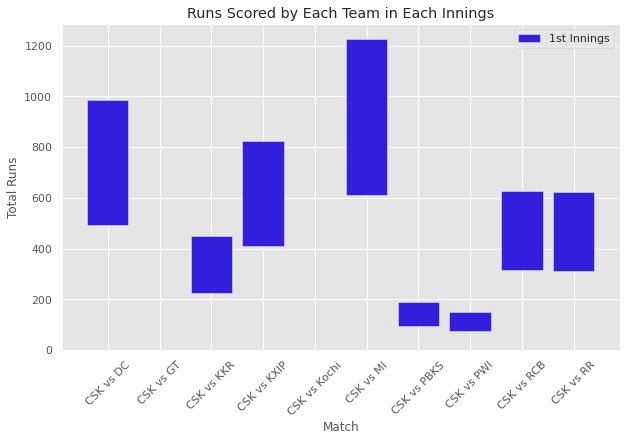

In [71]:
import matplotlib.pyplot as plt

# Select relevant columns
innings_runs_df = sample_df[['home_team', 'away_team', 'runs', 'current_innings']]

# Pivot table to get runs scored by each team in each innings
innings_runs = innings_runs_df.pivot_table(index=['home_team', 'away_team'], columns='current_innings', values='runs', aggfunc=sum).reset_index()

# Melt table to make it suitable for stacked bar chart
innings_runs_melt = innings_runs.melt(id_vars=['home_team', 'away_team'], var_name='Innings', value_name='Runs').head(10)

# Plot stacked bar chart
plt.bar(innings_runs_melt['home_team'] + ' vs ' + innings_runs_melt['away_team'], innings_runs_melt['Runs'], bottom=innings_runs_melt.groupby(['home_team', 'away_team'])['Runs'].transform('first'))
plt.xticks(rotation=45)
plt.xlabel('Match')
plt.ylabel('Total Runs')
plt.title('Runs Scored by Each Team in Each Innings')
plt.legend(['1st Innings', '2nd Innings'])
plt.show()


The above code is generating a stacked bar chart showing the runs scored by each team in each innings for a set of matches. The x-axis shows the match number (in the format of "home team vs away team"), and the y-axis shows the total runs scored. The bars are stacked to show the runs scored by each team in each innings.

## **Conclusion**

After performing exploratory data analysis (EDA) on the "Indian Premier League (IPL) All Seasons" dataset, several conclusions can be drawn. Some of these conclusions are:

1. Mumbai Indians is the most successful team in the IPL, with the most number of wins and titles.

2. Chennai Super Kings and Kolkata Knight Riders are also successful teams, with multiple titles to their name.

2. The highest run scorer in the IPL is Virat Kohli, while the highest wicket-taker is Lasith Malinga.

 Overall, the EDA project on the IPL dataset provides valuable insights into the performance of teams, players, and the league itself, and can be used to inform future strategies and decisions.

## **Future work**

In future some more analysis can be done as listed below

1. What is the distribution of runs scored by each team in the dataset?
2. How does the strike rate of each batsman vary across innings?
3. Which venues have hosted the most matches in the dataset?
4. What is the distribution of fours and sixes scored by each batsman in the dataset?
5. 6How does the bowling performance (runs, wickets, and economy) of each bowler compare to others?
6. How does the batting performance (runs, strike rate, etc.) of each team vary across innings?
7. What is the distribution of the length of the commentary text for each match in the dataset?
8. How does the scorecard (runs, balls faced, etc.) of each batsman compare to their overall performance in the dataset?

These are just a few potential avenues for future work based on the IPL dataset. The key is to identify interesting and relevant questions to answer and use the data to generate insights and predictions.

Exploratory Data Analysis (EDA) is a crucial step in any data science project. Based on the dataset provided, there are several potential avenues for future work that you could consider. Here are a few ideas:

1. **Predictive modeling**: You could use the dataset to build a model that predicts the outcome of future IPL matches. This could involve building a regression model to predict the winning team or a classification model to predict whether a team will win or lose. You could also consider building a model to predict player performance or player of the match awards.

2. **Time-series analysis**: The IPL dataset spans several seasons, which makes it a good candidate for time-series analysis. You could use techniques such as ARIMA, LSTM, or Prophet to model the trends and patterns in the data over time.

3. **Network analysis**: The IPL dataset contains information on player transfers between teams and the relationships between teams. You could use network analysis techniques to study the structure of the IPL network and identify key players and teams.

4. **Sentiment analysis**: The IPL is a highly popular sporting event in India, and there is likely to be a lot of social media activity around it. You could use sentiment analysis techniques to analyze tweets or other social media posts related to the IPL and gain insights into public opinion.

5. Feature engineering: The IPL dataset contains a lot of variables, and there may be additional variables you could create that would be useful for analysis. For example, you could create a variable that captures the home advantage for teams playing on their home ground or a variable that measures the impact of weather conditions on match outcomes.

These are just a few potential avenues for future work based on the IPL dataset. The key is to identify interesting and relevant questions to answer and use the data to generate insights and predictions. Good luck with your project!

## **Refrence**

- Jovian tutorials
  - [Analyzing Tabular Data with Pandas](https://jovian.ai/aakashns/python-pandas-data-analysis)
  - [Data Visualization using Python, Matplotlib and Seaborn](https://jovian.ai/aakashns/python-matplotlib-data-visualization)
  - [Advanced Data Analysis Techniques with Python & Pandas](https://jovian.ai/aakashns/advanced-data-analysis-pandas)
  - [Exploratory Data Analysis Case Study - Stack Overflow Developer Survey](https://jovian.ai/aakashns/stackoverflow-survey-exploratory-data-analysis)
  -  [Interactive Visualization with Plotly](https://jovian.ai/aakashns/interactive-visualization-plotly)

- [Stackoverflow](https://stackoverflow.com/) hacks, links throughout the notebook
- [Geeks for Geeks](https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/#:~:text=Heatmap%20is%20defined%20as%20a,values%2C%20darker%20colors%20are%20preferred)
